# This is a Linear Regression project which is a slight improvement from a similar project created by my friend Soumitri Chatterjee. I have reduced the mean squared error from about 1.99 to around 1.46.

In [176]:
import pandas as pd

In [117]:
data=pd.read_csv('Advertising.csv', index_col=0)
#display first 5 rows
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [118]:
data.shape

(200, 4)

In [119]:
import seaborn as sns

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


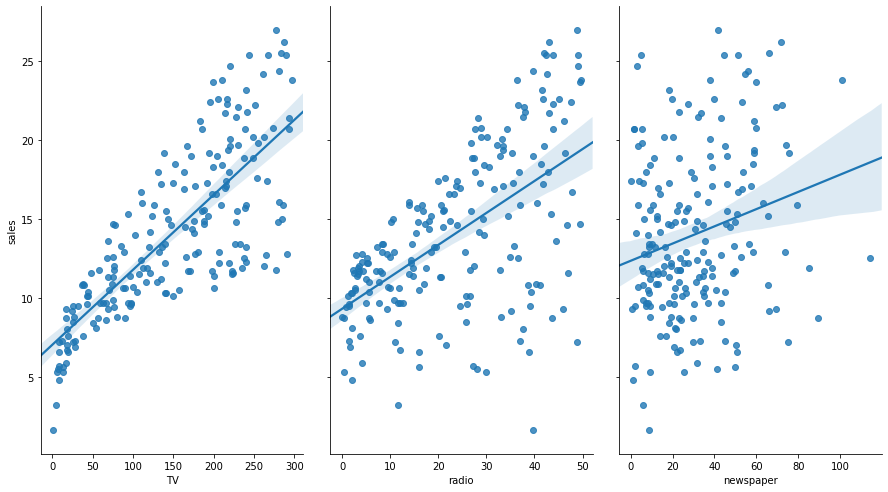

In [120]:
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars='sales',size=7,aspect=0.6,kind='reg')

In [121]:
X=data[['TV','radio','newspaper']]

In [122]:
y=data['sales']

In [123]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=110)

In [124]:
# import model
from sklearn.linear_model import LinearRegression

#instantiate
linreg=LinearRegression()

#fit the model to the training data(learn the coefficients )
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
y_preds=linreg.predict(x_test)

In [127]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_preds,y_test))

1.671475858184128


We now try to minimise the mean squared error by checking the mean squared error for each value in the range [1,200). 


In [165]:
#initializing two empty lists
random=[]
number=[]

In [166]:
def rand(i):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    #instantiate
    linreg=LinearRegression()
    linreg.fit(x_train, y_train)
    y_preds=linreg.predict(x_test)
    return(mean_squared_error(y_preds,y_test))
    
    

In [167]:
for i in range(1,200):
    random.append(rand(i))
    number.append(i)

In [168]:
print(random)

[1.9918855518287877, 4.5031259450461265, 2.153781905661566, 2.2171510725419, 2.5509646159531063, 1.845060513084834, 2.429070706657995, 4.31789036290908, 1.835739578098409, 6.700486756528875, 5.17787961547337, 2.8132411037828353, 2.0881207094289955, 4.9629473809923175, 2.7712017668982734, 1.8811019805562246, 4.535785391880795, 4.412294238614658, 2.6981440169960544, 3.5030713008418344, 2.7593644531711687, 2.4670444935943925, 2.8194297508059107, 2.3311627920542732, 3.289870291916715, 2.5052493735558663, 2.279413800731027, 2.947453560660708, 3.070051983682347, 2.5659058796031653, 2.084760022553116, 4.742744613958631, 2.3219807003843824, 3.1911211213641795, 4.504886608575366, 2.160234290325512, 2.9203136011613546, 1.9037079069735996, 3.1893837422150213, 5.544921079243522, 3.631878913941108, 3.1740973539761046, 2.055024793441357, 3.001870383230365, 2.2564942472809393, 2.8917358382360048, 3.2099110389833667, 2.3414625220669913, 4.810628628064607, 2.1705451765348354, 2.115315847151296, 4.42019

In [169]:
df=pd.DataFrame(random)

In [170]:
df

,0
0,1.991886
1,4.503126
2,2.153782
3,2.217151
4,2.550965
...,...
194,4.323722
195,3.237494
196,3.702784
197,2.725469


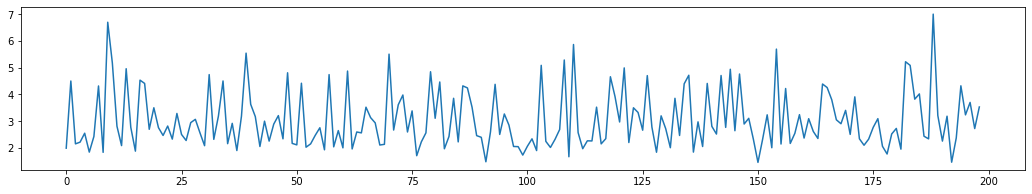

In [171]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,3))
plt.plot(df)

In [172]:
df.min()

0    1.460488
dtype: float64

In [173]:
min=1000000000
j=0
for i in range(0,198):
    if(random[i]<=min):
        min=random[i]
        j=number[i]
    

In [174]:
print(j)

151


In [175]:
print(min)

1.4604883814622467


In [164]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=151)
linreg=LinearRegression()
linreg.fit(x_train, y_train)
y_preds=linreg.predict(x_test)
print(mean_squared_error(y_preds,y_test))
    

1.4604883814622467
